<a href="https://colab.research.google.com/github/ealsk/Undergrad-DeepLearning-20Fall/blob/master/01_handpose_20F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from skimage import io

In [3]:
#from nnutil_20 import random_crop
#from nnutil_20 import center_crop
from nnutil_20 import crop_generator
from nnutil_20 import GetTimeString
from nnutil_20 import MakeDir
from nnutil_20 import imshow

ModuleNotFoundError: ignored

In [4]:
tf.__version__

'2.4.0'

dataset

In [5]:
#datadir = './dataset/handpose_20F_small_mini'
datadir = './dataset/handpose_20F_small_training'
datadir_val = './dataset/handpose_20F_small_100_val'

In [6]:
!ls $datadir

ls: cannot access './dataset/handpose_20F_small_training': No such file or directory


In [7]:
!ls $datadir_val

ls: cannot access './dataset/handpose_20F_small_100_val': No such file or directory


In [8]:
MakeDir('out')

NameError: ignored

이미지 불러오기 Generator 설정

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

In [10]:
f = 1.1

In [11]:
target_size=(int(300//f), int(400//f))
print(target_size)

(272, 363)


In [12]:
train_generator = train_datagen.flow_from_directory(
        datadir,
        target_size=target_size, #150,200
        batch_size=32*4, 
        shuffle=True,
        class_mode='categorical' )

FileNotFoundError: ignored

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
val_generator = val_datagen.flow_from_directory(
        datadir_val,
        target_size=target_size,#150,200
        batch_size=16,
        class_mode='categorical')

In [ ]:
train_generator.class_indices

In [ ]:

n_classes = len(train_generator.class_indices)
print(n_classes)

crop generator

In [13]:

w = 224

In [14]:
train_crops = crop_generator(train_generator, w) #224
val_crops = crop_generator(val_generator, w) #224

NameError: ignored

In [15]:
#input_shape=(224, 224, 3)
input_shape=(w, w, 3)
print(input_shape)

(224, 224, 3)


In [16]:
tstring = GetTimeString()#DDUtil
print(tstring)

#x,y = train_generator.next()
x,y = next(train_crops)
print(x.shape) # (128, 100, 100, 3) = (배치갯수, h, w, 채널)
print(y.shape) # (128, 6) = (배치갯수, 클래스)

NameError: ignored

In [17]:
for i in range(0,10):
    image = x[i]
    f1=plt.figure()
    imshow(image, '{}'.format(y[i]))
    fnfig = 'out/{}_{}.png'.format(tstring, i)
    io.imsave(fnfig, image)
    #f1 = plt.gcf()
    fnfig = 'out/{}_{}_fig.png'.format(tstring, i)
    f1.savefig(fnfig)
    print(fnfig)

NameError: ignored

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    #keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(n_classes, activation='softmax')])

model.summary()

NameError: ignored

In [19]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

NameError: ignored

In [20]:
# steps_per_epoch should be (number of training images total / batch_size) 
# validation_steps should be (number of validation images total / batch_size)

In [21]:
#history = model.fit_generator(train_generator, steps_per_epoch = 50, epochs=50)

history = model.fit_generator(train_crops, 
                              steps_per_epoch = 50, 
                              epochs=50, 
                              validation_data=val_crops, #val_generator
                              validation_steps=50 )

NameError: ignored

학습모델 저장하기

In [22]:
model.save('handpose_{}.h5'.format(w))

NameError: ignored

학습과정 살펴보기

NameError: ignored

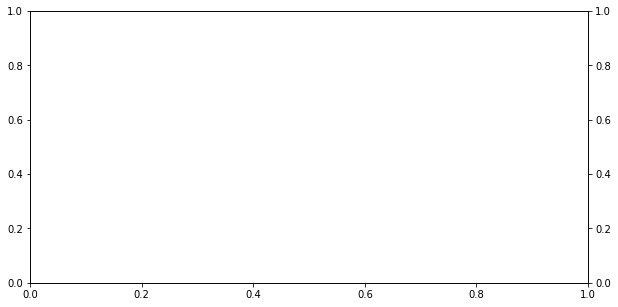

In [23]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10,5))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss', linewidth=1)
loss_ax.plot(history.history['val_loss'], 'r', label='val loss', linewidth=1)
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc', linewidth=1)
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc', linewidth=1)
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper center')
#plt.title(cellName[celltype])

테스트해보기

In [24]:
test_dir = datadir_val

In [25]:
BATCH_SIZE = 10

In [26]:
eval_generator = val_datagen.flow_from_directory(
test_dir,target_size=target_size,#150,200
batch_size=BATCH_SIZE,
shuffle=False,
seed=42)
eval_crops = crop_generator(eval_generator, w) #224

NameError: ignored

In [27]:
res = model.evaluate_generator(eval_crops,
 steps = np.ceil(len(eval_generator) / BATCH_SIZE),
 use_multiprocessing = False,
 verbose = 1,
 workers=1
 )
print('Test loss:' , res[0])
print('Test accuracy:',res[1])

NameError: ignored

In [ ]:
print('Test 정확도 : {:.2f}%'.format(res[1] * 100.0))

하나만 꺼내서 테스트 해보기

In [28]:
eval_x,eval_y = next(eval_crops)

NameError: ignored

In [29]:
eval_x.shape # (1, 100, 100, 3) = (배치갯수, h, w, 채널)
             # 이 경우 batch 갯수는 1

NameError: ignored

In [ ]:
eval_y.shape #(1, 6)

In [30]:
predictions_array = model.predict(eval_x)
print(predictions_array.shape)

NameError: ignored

In [ ]:
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함.

In [ ]:

max_prob = np.max(predictions_array[0])

In [31]:
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('Prediction: #{} --> {:.2f}%'.format(max_idx, max_prob*100.0))

NameError: ignored

In [32]:
tstring = GetTimeString()#DDUtil
image = eval_x[0]
f1=plt.figure()
imshow(image, 'Prediction: #{} --> {:.2f}%'.format(max_idx, max_prob*100.0))
fnfig = 'out/{}_eval.png'.format(tstring)
io.imsave(fnfig, image)
#f1 = plt.gcf()
fnfig = 'out/{}_eval_fig.png'.format(tstring)
f1.savefig(fnfig)
print(fnfig)

NameError: ignored